# Movie Analysis study

## 1.Business Understanding

##  a) Introduction
This project will involve analyzing movie ratings, movie basics, and gross income using exploratory data analysis 
to generate insights for a business stakeholder.The main goal of this analysis is to provide 
the stakeholder with actionable insights that can beused to make bussiness decisions.

## b) Problem statement
The movie industry is highly competitive and it is important for companies to make informed bussiness decisions 
in order to stay ahead of the competion.In this project, we will be analyzing various 

## c) Main objective
The main objective of this project is to generate insights that can be used to make informed business decisions. 
These insights can help stakeholders identify trends, patterns, and relationships in the data that may not be immediately apparent. 
By analyzing the data, you can identify areas where improvements can be made and opportunities for growth

## d) Specific objectives
 - Understand the contents ofe eache dataset
 - Perform data cleaning to gfind the missing values know the kind ofdatatypes we are using
 - To identify which movies have the highest ratings and number of votes
 - to get to know the average and the highest gross profit that is found in a movie
 - to also get to know the best actors based on the movie tittles

## 2. Importing Libraries

In [129]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 3. Reading Data

In [130]:
#loading gross data and previewing the first 5 rows
gross_df = pd.read_csv('CSV files/bom.movie_gross.csv')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [131]:
#loading basics data and previewing the first 5 rows
basics_df = pd.read_csv('CSV files/name.basics.csv')
basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [132]:
#loading budgets data and previewing the first 5 rows
budgets_df = pd.read_csv('CSV files/tn.movie_budgets.csv')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [133]:
#loading rbudgets data and previewing the first 5 rows
ratings_df = pd.read_csv('CSV files/title.ratings.csv')
ratings_df


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [134]:
#loading im datbase
#conn = sqlite3.connect('im.db')
#cur = conn.cursor()
#pd.read_sql

## 4. Data Preparation

### 4.1 Checking what each Dataframe consists

### 4.1.1 Gross_df

In [135]:
# getting to understand what gross contains
#info for the overview of the data
gross_df.info()
# getting the rows and columns
gross_df.shape
#describing the data
gross_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### 4.1.2 Basics_df

In [136]:
# getting to understand what basics contains
#info for the overview of the data
basics_df.info()
# getting the rows and columns
basics_df.shape
#describing the data
basics_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [137]:
# getting to understand what budgets contains
#info for the overview of the data
budgets_df.info()
# getting the rows and columns
budgets_df.shape
#describing the data
budgets_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### 4.1.3 Ratings_df

In [138]:
# getting to understand what ratings contains
#info for the overview of the data
ratings_df.info()
# getting the rows and columns
ratings_df.shape
#describing the data
ratings_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### 4.2 Checking missing and duplicated values
- Finding rows with missing values in each dataset and removing them.
- Finding rows with duplicates and dropping them

#### 4.2.1 Gross_df

In [139]:
# checking if gross_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_gross = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_gross.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_gross)
    if (len(missing_set) == 1):
        out = print("There are no missing values in gross_df")
    else:
        out = print("There are missing values in gross_df.")

    return out


identify_missing_values(gross_df)

There are missing values in gross_df.


In [140]:
# now that the data has missing values we then check the sum of the values missing under each column.
#Finding missing values in gross_df
def missing_values(data):
    #identifying the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    #storing the missing values i a new dataframe
    gross_missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)":percentage_miss})
    #here we now remove the missing values
    gross_missing.drop(gross_missing[gross_missing["Percentage(%)"]== 0].index, inplace = True)
    
    return gross_missing
                                                   
missing_data = missing_values(gross_df)
missing_data


,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [141]:
# checking for duplicated rows in gross_df
duplicate_rows = gross_df.duplicated()

# Remove duplicate rows
gross_df = gross_df.drop_duplicates()

In [142]:
#lets now drop the missing values in gross df
gross_df = gross_df.dropna(subset=['domestic_gross', 'studio', 'foreign_gross'])
gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


#### 4.2.2 Basic_df

In [143]:
# checking if basics_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_basics = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_basics.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_basics)
    if (len(missing_set) == 1):
        out = print("There are no missing values in basics_df")
    else:
        out = print("There are missing values in basics_df.")

    return out


identify_missing_values(basics_df)

There are missing values in basics_df.


In [144]:
# now that the data has missing values we then check the sum of the values missing under each column.
#Finding missing values in gross_df
def missing_values(data):
    #identifying the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    #storing the missing values i a new dataframe
    basics_missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)":percentage_miss})
    #here we now remove the missing values
    basics_missing.drop(basics_missing[basics_missing["Percentage(%)"]== 0].index, inplace = True)
    
    return basics_missing
                                                   
missing_data = missing_values(basics_df)
missing_data

,Missing Values,Percentage(%)
death_year,599865,0.988819
birth_year,523912,0.863618
primary_profession,51340,0.084629
known_for_titles,30204,0.049788


In [145]:
# Check for duplicate rows in basics_df
duplicate_rows = basics_df.duplicated()

# Remove duplicate rows
basics_df = basics_df.drop_duplicates()

In [146]:
#lets now drop the missing values in gross df
basics_df = basics_df.dropna(subset=['death_year', 'birth_year', 'primary_profession', 'known_for_titles'])
basics_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
32,nm0071116,Valérie Benguigui,1961.0,2013.0,"actress,soundtrack","tt0119344,tt2179121,tt2150708,tt1068646"
38,nm0073426,Laxmikant Berde,1954.0,2004.0,actor,"tt0260066,tt0155719,tt0215079,tt0481241"
62,nm0083767,Fernando Birri,1925.0,2017.0,"director,actor,writer","tt0286104,tt0056102,tt0078039,tt0096077"
64,nm0085193,Bill Black,1926.0,1965.0,"actor,soundtrack","tt1087605,tt0072979,tt0293821,tt0243490"
71,nm0087190,Maurice Blanchot,1907.0,2003.0,writer,"tt7781736,tt0244050,tt9173540,tt1784698"
...,...,...,...,...,...,...
599067,nm9425078,Lil Peep,1996.0,2017.0,"actor,music_department","tt9268840,tt9364190,tt9742444,tt9062012"
600210,nm9211845,Jan C. Gabriel,1940.0,2010.0,"director,writer,editor",tt7269630
602878,nm7455311,Joost van der Westhuizen,1971.0,2017.0,producer,"tt5154954,tt4856982"
603895,nm8201131,Lewis Lucky Carrillo III,1968.0,2017.0,"actor,producer","tt5790156,tt7066600,tt5306204"


####  Budgets_df

In [147]:
# checking if budgets_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_budgets = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_budgets.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_budgets)
    if (len(missing_set) == 1):
        out = print("There are no missing values in budgets_df")
    else:
        out = print("There are missing values in budgets_df.")

    return out


identify_missing_values(budgets_df)

There are no missing values in budgets_df


In [148]:
# Since Budgets does not have any missing values we dont have anything to clean

In [149]:
# Check for duplicate rows in budgets
duplicate_rows = budgets_df.duplicated()

# Remove duplicate rows
budgets_df = budgets_df.drop_duplicates()
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### 4.2.3 Ratings_df

In [150]:
# checking if ratings_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_ratings = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_ratings.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_ratings)
    if (len(missing_set) == 1):
        out = print("There are no missing values in ratings_df")
    else:
        out = print("There are missing values in ratings_df.")

    return out

identify_missing_values(ratings_df)

There are no missing values in ratings_df


Since ratings_df has no missing values we find out if there are any duplicates.

In [151]:
# Check for duplicate rows in ratings
duplicate_rows = ratings_df.duplicated()

# Remove duplicate rows
ratings_df = ratings_df.drop_duplicates()
ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## 5 Data Analysis and Visualization
- Selecting relevant columns 
- Plotting and analyzing graphs

### 5.1 Gross_df

In [152]:
#selecting relevant columns to use in gross
#Creating a new dataframe with the selected columns.
new_gross_df = gross_df[['title', 'domestic_gross']]
new_gross_df

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3275,I Still See You,1400.0
3286,The Catcher Was a Spy,725000.0
3309,Time Freak,10000.0
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0


In [153]:
#finding movies with the highest domestic gross
#sorting datasets in descending order to get the first 10
new_gross_df = new_gross_df.sort_values(by='domestic_gross', ascending=False)
new_gross_df.head(10)

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0
2758,Star Wars: The Last Jedi,620200000.0
3082,Incredibles 2,608600000.0
2323,Rogue One: A Star Wars Story,532200000.0
2759,Beauty and the Beast (2017),504000000.0
2324,Finding Dory,486300000.0


In [154]:
# finding movies with least domestic gross
#sorting datasets with descending order but only focusing on the last 10
new_gross_df = new_gross_df.sort_values(by='domestic_gross', ascending=False)
new_gross_df.tail(10)

,title,domestic_gross
650,Little Girl (La Pivellina),1400.0
3221,Marrowbone,1400.0
3268,Billionaire Boy's Club,1300.0
1259,Khumba,1000.0
1279,Billy and Buddy,900.0
292,Perrier's Bounty,800.0
1738,Jackpot,800.0
2920,Amityville: The Awakening,700.0
642,Illegal (2011),700.0
1018,Apartment 143,400.0


When looking at movies with the least domestic gross its evideent that drama movies are not the best to venture in.

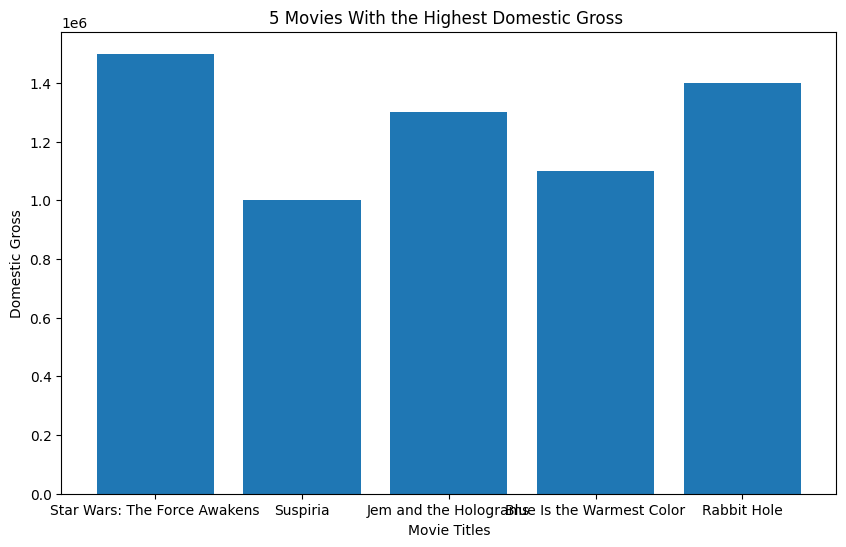

In [155]:
#plotting a graph with the movies with the higest domestic gross.
#getting the top five domestic gross profit that was accrued
top_domestic_gross = new_gross_df['domestic_gross'].value_counts().head(5).index.tolist()
top_domestic_gross

#getting the best movie titles that had highest domestic gross
top_title = new_gross_df['title'].value_counts().head(5).index.tolist()
top_title

#plotting title vs domestic gross in gross csv
bar_chart_title = '5 Movies With the Highest Domestic Gross '
bar_chart_movie_label = 'Movie Titles'
bar_chart_count_label = 'Domestic Gross'

plot_movie_analysis, ax = plt.subplots(figsize =(10,6))

plt.bar(top_title, top_domestic_gross)

#adding title to labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_movie_label)
plt.ylabel(bar_chart_count_label)

plt.show()

The above graph shows the relationship between the top five movie titles with the highest gross profit which indicate that action,science fiction and adventure movies return the highest domestic profit which are also the best to venture in. 

### 5.2 Basics_df

In [156]:
#selecting relevant columns in basics
#Creating a new dataframe with the selected columns.
new_basics_df = basics_df[['primary_name', 'known_for_titles']]
new_basics_df

,primary_name,known_for_titles
32,Valérie Benguigui,"tt0119344,tt2179121,tt2150708,tt1068646"
38,Laxmikant Berde,"tt0260066,tt0155719,tt0215079,tt0481241"
62,Fernando Birri,"tt0286104,tt0056102,tt0078039,tt0096077"
64,Bill Black,"tt1087605,tt0072979,tt0293821,tt0243490"
71,Maurice Blanchot,"tt7781736,tt0244050,tt9173540,tt1784698"
...,...,...
599067,Lil Peep,"tt9268840,tt9364190,tt9742444,tt9062012"
600210,Jan C. Gabriel,tt7269630
602878,Joost van der Westhuizen,"tt5154954,tt4856982"
603895,Lewis Lucky Carrillo III,"tt5790156,tt7066600,tt5306204"


In [177]:
#sorting  values in basics based on known for titles
new_basics_df = new_basics_df.sort_values(by='known_for_titles', ascending=True)
new_basics_df

,primary_name,known_for_titles
104895,Leonid Andreyev,"tt0002022,tt0006323,tt0228767,tt0014972"
68257,Hugo von Hofmannsthal,"tt0003227,tt0252899,tt0441378,tt0252896"
66390,Lois Weber,"tt0003424,tt0004325,tt0008041,tt0025985"
11680,Oliver Goldsmith,"tt0003507,tt0003506,tt0008735,tt0153527"
50644,Salvatore Cammarano,"tt0004733,tt0038707,tt0091541,tt0041991"
...,...,...
61583,André Bazin,"tt9728354,tt0209335"
29762,Carl Boenisch,"tt9779906,tt0064397,tt0077564,tt0065602"
15036,Altina Carey,"tt9803222,tt0053858"
444926,Raymond Defossé,"tt9810014,tt2008562,tt4589186,tt5289334"


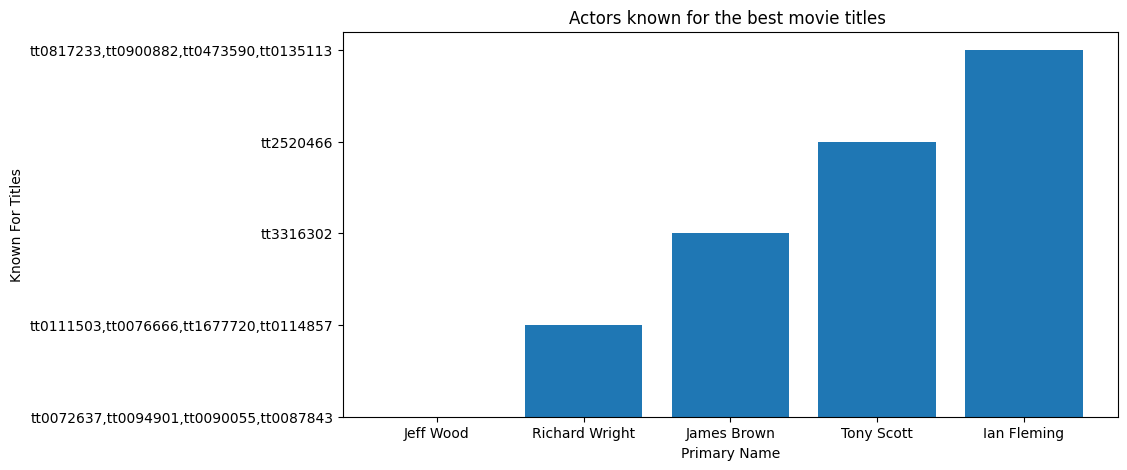

In [176]:
#getting the best movie titles that had highest domestic gross
top_actors_names = new_basics_df['primary_name'].value_counts().head(5).index.tolist()
top_actors_names

#getting the best movie titles that had highest domestic gross
top_known_titles = new_basics_df['known_for_titles'].value_counts().head(5).index.tolist()
top_known_titles

#plotting title vs domestic gross in gross csv
bar_chart_title = 'Actors known for the best movie titles '
bar_chart_actor_names = 'Primary Name'
bar_chart_known_titles= 'Known For Titles'

plot_movie_analysis, ax = plt.subplots(figsize =(10,5))

plt.bar(top_actors_names, top_known_titles)

#adding title to labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_actor_names)
plt.ylabel(bar_chart_known_titles)

plt.show()

### 5.3 Ratings_df

In [159]:
#filtering ratings_df to have movie tittles with more than 1500 number of votes
new_ratings_df = ratings_df.loc[ratings_df['numvotes']>1500]
#sorting values and displaying top ten movies with more than 1500 votes
new_ratings_df = new_ratings_df.sort_values(by=['numvotes', 'averagerating'], ascending=False)[:10]
new_ratings_df.reset_index()

,index,tconst,averagerating,numvotes
0,63498,tt1375666,8.8,1841066
1,8738,tt1345836,8.4,1387769
2,24920,tt0816692,8.6,1299334
3,38058,tt1853728,8.4,1211405
4,48221,tt0848228,8.1,1183655
5,39356,tt0993846,8.2,1035358
6,3140,tt1130884,8.1,1005960
7,25777,tt2015381,8.1,948394
8,60518,tt1431045,8.0,820847
9,63506,tt1392170,7.2,795227


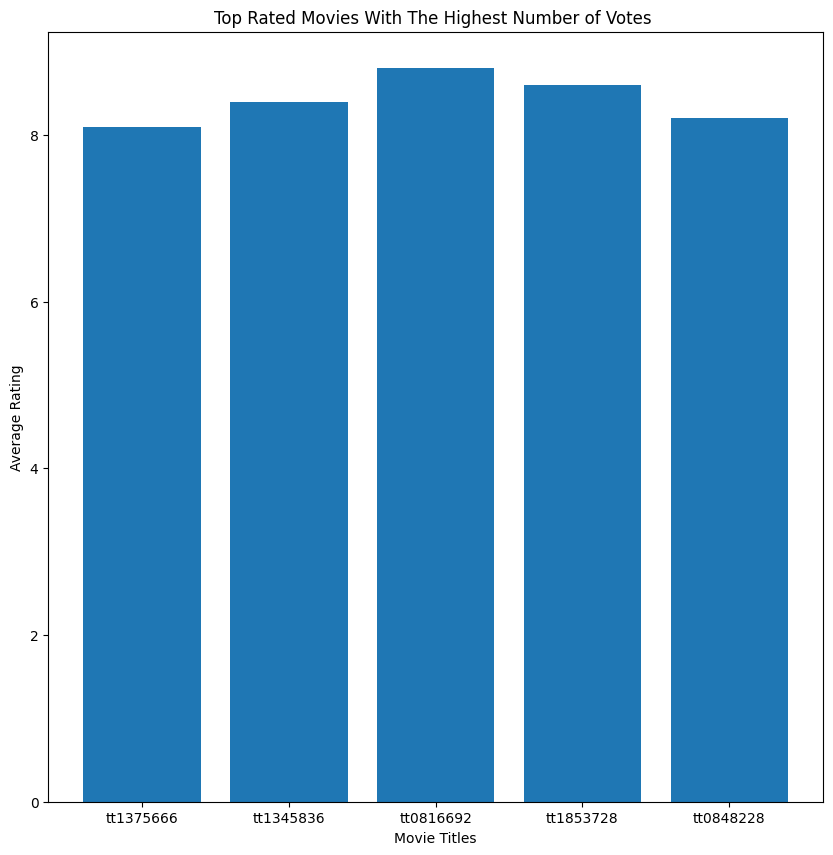

In [160]:
#plotting the graph with averagerating and title based on the number of votes.
top_movie_titles = new_ratings_df['tconst'].value_counts().head(5).index.tolist()
top_movie_titles

#getting the top five movies average rating based on the number of votes
average_ratings = new_ratings_df['averagerating'].value_counts().head(5).index.tolist()
average_ratings

#plotting title vs domestic gross in gross csv
bar_chart_title = 'Top Rated Movies With The Highest Number of Votes '
bar_chart_movie_title = 'Movie Titles'
bar_chart_average= 'Average Rating'

plot_movie_analysis, ax = plt.subplots(figsize =(10,10))

plt.bar(top_movie_titles, average_ratings)

#adding title to labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_movie_title)
plt.ylabel(bar_chart_average)

plt.show()

This shows the title of movies that were voted for with most people which influenced the ratings.
This also means that most people watched the movies.

# 6.Conclusions
 - Action, Science-fiction and adventure movies are the best to invest in for one to get more domestic gross income while drama movies have low domestic income
 - The number of people watching a movie will detamine the average rating of the movie from their votes.
 

# 7.Recommendation
